In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/Dataset/Train'
test_set = '/content/drive/MyDrive/Dataset/Test'

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgnet = VGG19(input_shape = IMAGE_SIZE +[3], weights='imagenet',include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgnet.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
x = Flatten()(vgnet.output)

In [ ]:
prediction = Dense(2,activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model
model = Model(inputs=vgnet.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 416 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 134 images belonging to 2 classes.


In [ ]:
ans = model.fit(
    training_set,
    validation_data = test_set,
    epochs=2
)

Epoch 1/2
13/13 [==============================] - 357s 28s/step - loss: 1.2837 - accuracy: 0.5385 - val_loss: 0.5802 - val_accuracy: 0.6940
Epoch 2/2
13/13 [==============================] - 351s 28s/step - loss: 0.5182 - accuracy: 0.7404 - val_loss: 0.5477 - val_accuracy: 0.7388


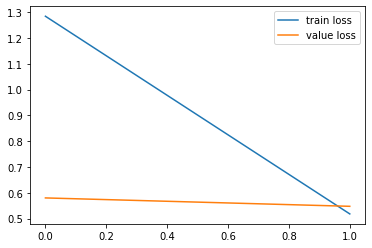

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ans.history['loss'],label='train loss')
plt.plot(ans.history['val_loss'],label='value loss')
plt.legend()
plt.show()

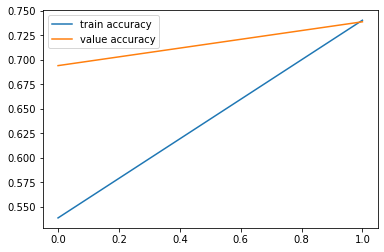

In [ ]:
plt.plot(ans.history['accuracy'],label='train accuracy')
plt.plot(ans.history['val_accuracy'],label='value accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('vgg19.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
model = load_model('vgg19.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/2.png',target_size=(224,224))
x.shape

In [ ]:
x = image.img_to_array(img)
x = x/255

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
x= np.expand_dims(x,axis=0)
img_data = preprocess_input(x)

In [ ]:
model.predict(img_data)

array([[0.8837131 , 0.11628681]], dtype=float32)

In [ ]:
value = np.argmax(model.predict(img_data),axis=1)

In [ ]:
if value==0:
  print("Uninfected")
else:
  print("Infected")

Uninfected
